# CDS-1 PROJECT ASSIGNMENT - IABAC™

## Problem Statement
INX Future Inc. is experiencing declining employee performance, resulting in increased service delivery issues and an 8% drop in client satisfaction. CEO Mr. Brain is concerned about penalizing non-performing employees, fearing it may harm overall morale and the company's reputation as a top employer. A data science project will analyze employee data to identify the root causes of these performance issues and provide insights on non-performing employees.








### The following insights are expected from this project.
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This
will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysi

## Dataset Overview

1. EmpNumber: Employee ID
2. Age: Employee's age
3. Gender: Employee's gender
4. EducationBackground: Educational background
5. MaritalStatus: Marital status
6. EmpDepartment: Department within the company
7. EmpJobRole: Job role in the company
8. BusinessTravelFrequency: Frequency of business travel
9. DistanceFromHome: Distance from home to work
10. EmpEducationLevel: Education level of the employee
11. EmpRelationshipSatisfaction: Satisfaction with 12.
     relationships at work
12. TotalWorkExperienceInYears: Total years of work
    experience
13. TrainingTimesLastYear: Number of training sessions
14. attended in the last year
15. EmpWorkLifeBalance: Work-life balance rating
16. ExperienceYearsAtThisCompany: Years of experience at
  this company
17. ExperienceYearsInCurrentRole: Years of experience in the current role
18. YearsSinceLastPromotion: Years since the last promotion
19. YearsWithCurrManager: Years working with the
    current manager
20. Attrition: Indicates if the employee has left the
   company (Yes/No)
21. PerformanceRating: Performance rating of the employee
This data is rich in features useful for analyzing employee performance, attrition, and factors contributing to job satisfaction and retention. It can be used for a variety of analyses, including identifying key drivers of performance, attrition prediction, and even constructing a predictive model for employee performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
display.max_columns=None
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Task 1: Data Analysis

In [ ]:
df.drop('EmpNumber',axis=1,inplace=True)

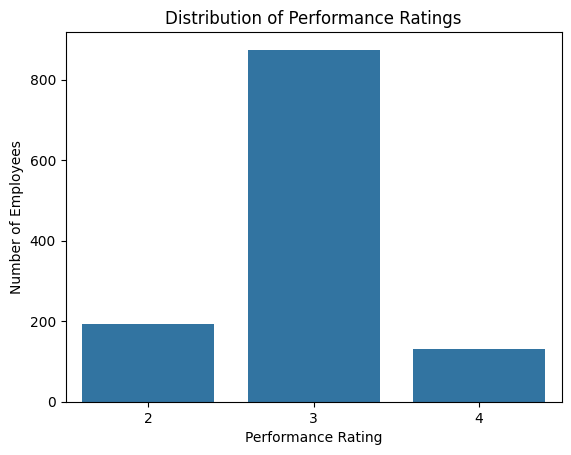

In [ ]:
sns.countplot(x='PerformanceRating', data=df)
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
df.shape

(1200, 27)

In [ ]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [ ]:
df.describe(include='object')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [ ]:
df.duplicated().sum()

0

#EDA

<Axes: xlabel='Gender', ylabel='Age'>

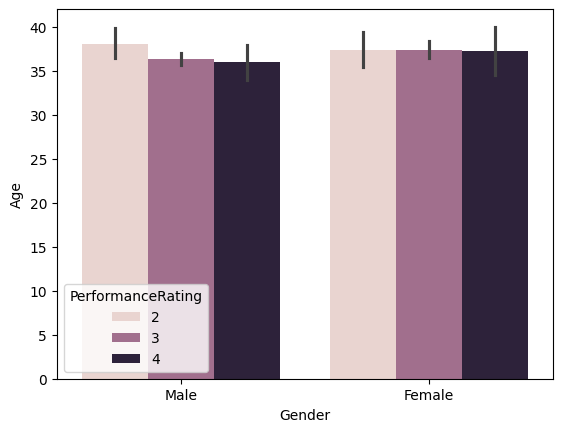

In [ ]:
sns.barplot(x='Gender', y='Age', hue='PerformanceRating', data=df)

The heights of the bars for each Performance Rating (represented in different colors) are almost the same for both genders.

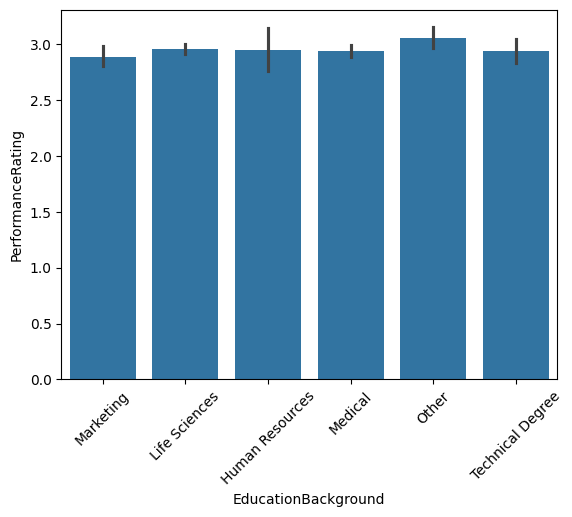

In [ ]:
sns.barplot(x='EducationBackground', y='PerformanceRating', data=df)
plt.xticks(rotation=45)
plt.show()


## Department wise performances

Text(0, 0.5, 'Average Performance Rating')

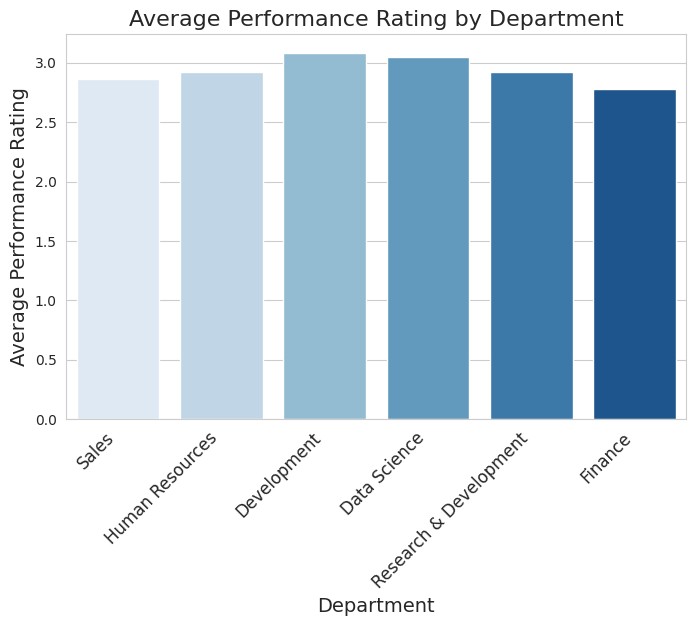

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=df, estimator=np.mean, ci=None, palette="Blues")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title("Average Performance Rating by Department", fontsize=16)
plt.xlabel("Department", fontsize=14)
plt.ylabel("Average Performance Rating", fontsize=14)

<Axes: >

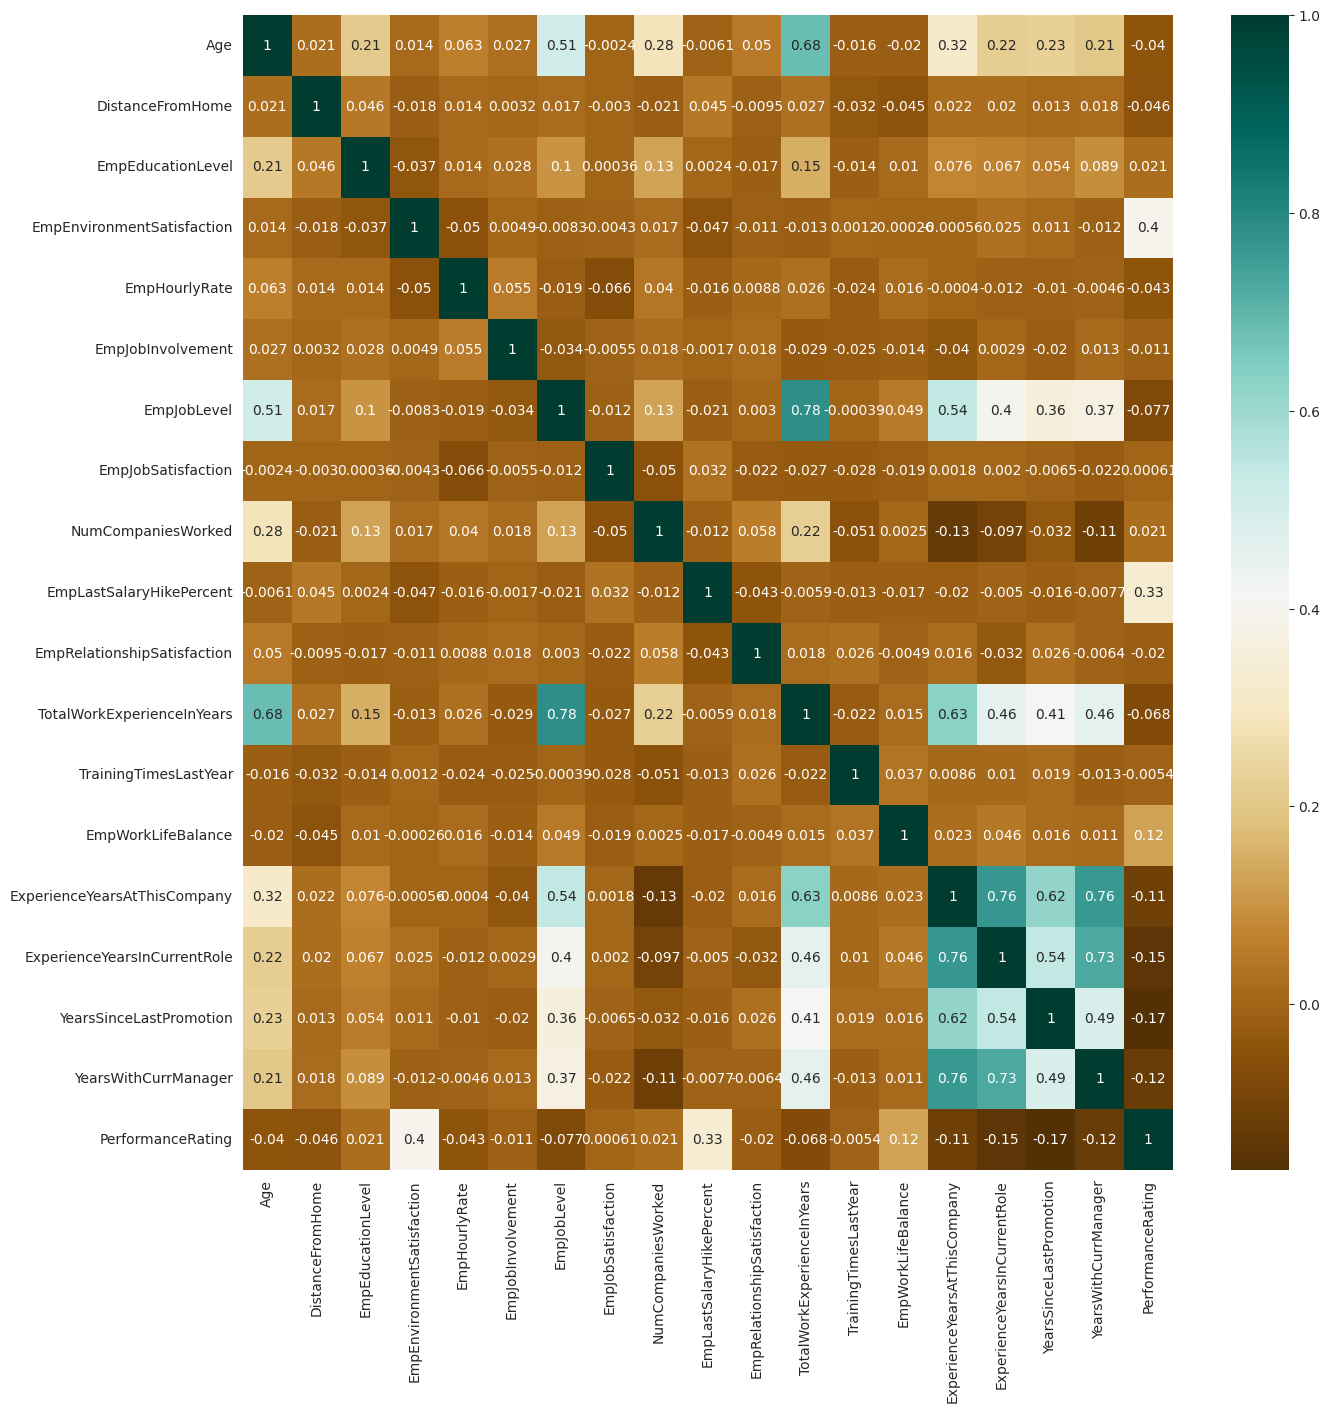

In [ ]:
plt.figure(figsize=(15,15))#increase plot size
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(),
            annot=True,
            cmap="BrBG",
            )

In [ ]:
df.describe(include='object')

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,6,3,6,19,3,2,2
top,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,725,492,548,373,270,846,847,1022


In [ ]:
df['BusinessTravelFrequency'].value_counts()

,count
BusinessTravelFrequency,
Travel_Rarely,846
Travel_Frequently,222
Non-Travel,132


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1022
Yes,178


In [ ]:
df['OverTime'].value_counts()

,count
OverTime,
No,847
Yes,353


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,725
Female,475


In [ ]:
df['EducationBackground'].value_counts()

,count
EducationBackground,
Life Sciences,492
Medical,384
Marketing,137
Technical Degree,100
Other,66
Human Resources,21


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,548
Single,384
Divorced,268


In [ ]:
df['EmpJobRole'].value_counts()

,count
EmpJobRole,
Sales Executive,270
Developer,236
Manager R&D,94
Research Scientist,77
Sales Representative,69
Laboratory Technician,64
Senior Developer,52
Manager,51
Finance Manager,49


In [ ]:
df['EmpDepartment'].value_counts()

,count
EmpDepartment,
Sales,373
Development,361
Research & Development,343
Human Resources,54
Finance,49
Data Science,20


#### To enhance our dataset for predictive modeling, we will systematically apply feature engineering techniques tailored to the three types of columns present. First, we will convert categorical columns, such as gender and education background, into numerical representations using onehot encoding. This process assigns unique integers to each category, facilitating their use in machine learning algorithms. Next, we will address the discrete columns, which already follow a proper order. We will map these ordinal values to integers to ensure they are numerically represented. Finally, we will standardize the continuous columns, such as employee hourly rates and job satisfaction scores, using the StandardScaler method. This will normalize the data, bringing all continuous variables to a common scale with a mean of zero and a standard deviation of one. By implementing these transformations, we will create a robust dataset that improves model performance and predictive accuracy.


In [ ]:
continuous_columns=['Age','DistanceFromHome','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

Discrete_columns=['EmpRelationshipSatisfaction','EmpEnvironmentSatisfaction','EmpWorkLifeBalance','EmpHourlyRate','EmpJobInvolvement',
                  'EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent','NumCompaniesWorked']
categorical_columns=['Gender', 'EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency',
                     'OverTime','Attrition']
ordinal_columns=['EmpEducationLevel']






## Handling categorical column


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
for i in categorical_columns:
  df[i]=ohe.fit_transform(df[[i]]).toarray()




In [ ]:
#ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['EmpEducationLevel']=oe.fit_transform(df[['EmpEducationLevel']])

In [ ]:
#LABLE ENCODER
col_2 = ['OverTime','Attrition']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col_2:
  df[i]=le.fit_transform(df[i])




In [ ]:
# standatd scalr on numerical columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[continuous_columns]=ss.fit_transform(df[continuous_columns])


In [ ]:
X=df.drop('PerformanceRating',axis=1)
y=df['PerformanceRating']


,PerformanceRating
0,3
1,3
2,4
3,3
4,3
...,...
1195,4
1196,3
1197,3
1198,3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
df['PerformanceRating'].value_counts()

,count
PerformanceRating,
3,874
2,194
4,132


In [ ]:
#weight  of each y_train
print(874/194)
print(874/132)




4.505154639175258
6.621212121212121


### Balancing The data

In [ ]:
#balancing the dta
from sklearn.utils import compute_sample_weight
sample_weights=compute_sample_weight(class_weight={3:1,2:4,4:6},y=y_train)

### Task 2: ML Algorithm (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train,sample_weight=sample_weights)



RandomForestClassifier()

In [ ]:
# test the model
y_pred=rf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8958333333333334
[[ 24   5   0]
 [ 13 171   0]
 [  0   7  20]]
              precision    recall  f1-score   support

           2       0.65      0.83      0.73        29
           3       0.93      0.93      0.93       184
           4       1.00      0.74      0.85        27

    accuracy                           0.90       240
   macro avg       0.86      0.83      0.84       240
weighted avg       0.91      0.90      0.90       240



In [ ]:
#setting up hyperparameter grid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train,sample_weight=sample_weights)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=grid_search.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9041666666666667
[[ 28   1   0]
 [ 14 170   0]
 [  0   8  19]]
              precision    recall  f1-score   support

           2       0.67      0.97      0.79        29
           3       0.95      0.92      0.94       184
           4       1.00      0.70      0.83        27

    accuracy                           0.90       240
   macro avg       0.87      0.86      0.85       240
weighted avg       0.92      0.90      0.91       240



###  Important Factors effecting employee performance

Text(0.5, 0, 'Importance')

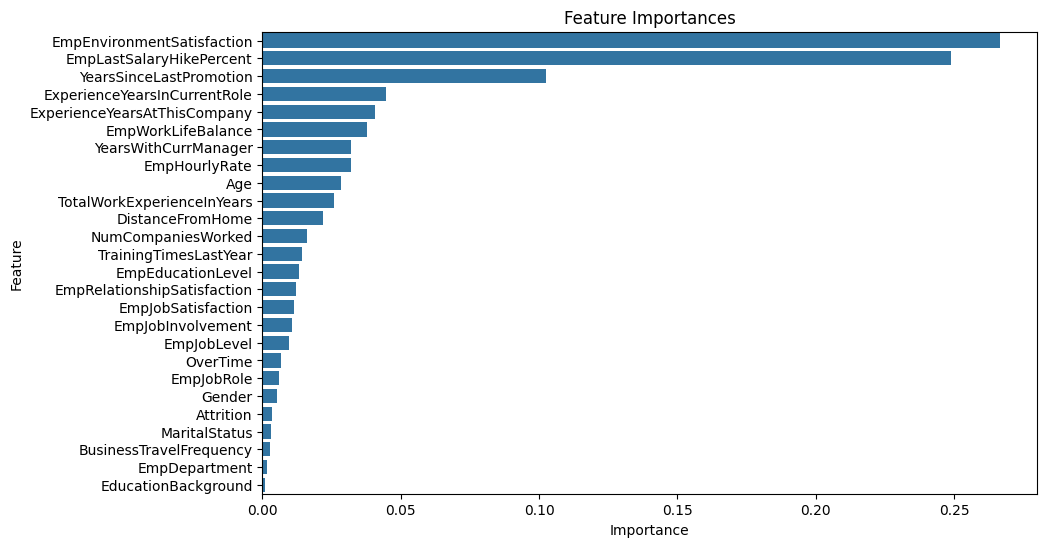

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')

##### Ater conducting a thorough analysis and visualizing our predictive model, we have identified several areas where improvements can significantly impact employee performance. Although factors such as education background, employee department, and business travel currently show lower contributions to performance metrics, enhancing these areas could yield beneficial outcomes for our organization. We can foster an environment that supports continuous improvement, ultimately leading to greater employee satisfaction and performance.



### Task 2: ML Algorithm (SVM)

> Add blockquote



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly']}
svc=SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Use fit_params to pass sample weights
grid_search.fit(X_train, y_train, **{'sample_weight': sample_weights})


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=grid_search.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7791666666666667
[[ 18   9   2]
 [ 22 156   6]
 [  0  14  13]]
              precision    recall  f1-score   support

           2       0.45      0.62      0.52        29
           3       0.87      0.85      0.86       184
           4       0.62      0.48      0.54        27

    accuracy                           0.78       240
   macro avg       0.65      0.65      0.64       240
weighted avg       0.79      0.78      0.78       240



### Task 2: ML Algorithm (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Resample your training data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and fit the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=10)
model.fit(X_resampled, y_resampled)



MLPClassifier(max_iter=300, random_state=10)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.52      0.52      0.52        29
           3       0.86      0.83      0.85       184
           4       0.41      0.52      0.46        27

    accuracy                           0.76       240
   macro avg       0.60      0.62      0.61       240
weighted avg       0.77      0.76      0.76       240

[[ 15  11   3]
 [ 14 153  17]
 [  0  13  14]]
0.7583333333333333


##### In our analysis of classification models, Random Forest achieved the highest F1 score of 91%, outperforming Support Vector Machines (SVM) at 78% and Artificial Neural Networks (ANN) at 76%. Given these results, there is a significant opportunity to enhance performance through targeted tuning and optimization across all models.

To improve accuracy, we recommend hyperparameter tuning using Grid Search or Random Search, along with feature engineering to create new features and assess their importance. Additionally, employing model ensembling techniques, ensuring thorough data preprocessing, and utilizing k-fold cross-validation will strengthen model evaluation. Focusing on these strategies, especially for the Random Forest model, can help achieve even higher F1 scores.






